# Import Library

In [71]:
# Import necessary library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# set seed
np.random.seed(2024)

# Dataset

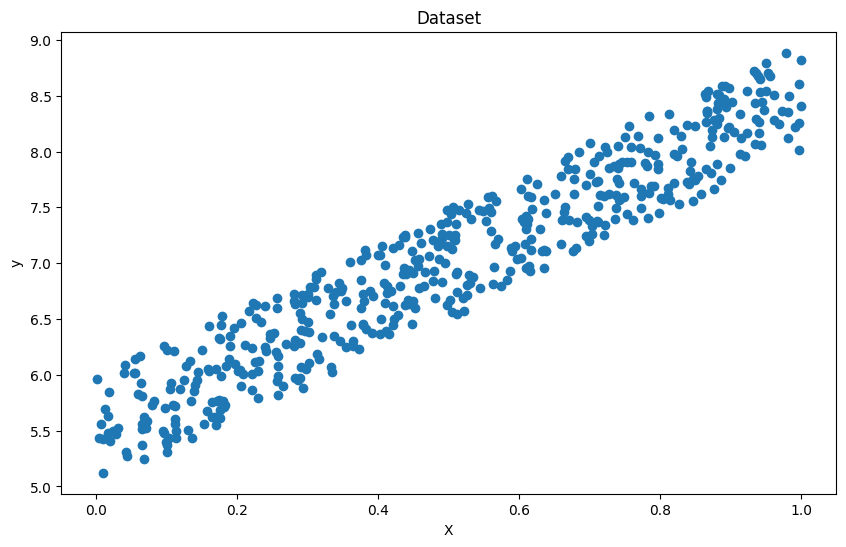

In [3]:
X = np.random.rand(500, 1) # X is set of random value
y = 5 + 3*X + np.random.rand(500, 1) # y = bias + alpha * X + w
fig = plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024) # train: 80% and test: 20%

print(f"Shape of train X: {X_train.shape}")
print(f"Shape of test X: {X_test.shape}")
print(f"Shape of train y: {y_train.shape}")
print(f"Shape of test y: {y_test.shape}")

Shape of train X: (400, 1)
Shape of test X: (100, 1)
Shape of train y: (400, 1)
Shape of test y: (100, 1)


# Linear Regression

In [ ]:
# If use list
y_true = [0, 1, 0, 1]
y_pred = [0, 0, 0, 1]
final = []
for i in range(len(y_true)):
    final.append(y_true[i] - y_pred[i])
print(final)

[0, 1, 0, 0]


In [ ]:
# If use np.array
def mean_squared_error_handle(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

Self-implement:  0.25
MSE:  0.25


In [ ]:
# Gradient Descent
n_samples, n_features = X_train.shape
# (400, 1) * (1, 1) -> (400, 1) = (400, 1) = y_true
weights = np.zeros(shape=(n_features,1))

# y_predict = X * weights + bias
bias = 0
y_predict = np.dot(X_train, weights) + bias
learning_rate = 0.01

# cost function = (1/2*n) sum((y_true - y_pred)**2)
cost = (1/(2*n_samples)) * np.sum((y_train - y_predict)**2)

# compute gradient
dw = (1/n_samples) * np.dot(X_train.T, (y_train - y_predict))
db = (1/n_samples) * np.sum((y_train - y_predict))

weights -= learning_rate * dw
bias -= learning_rate * db

# Print out the screen
print(f"Cost: {cost}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")

Cost: 4033279.4715563445
Weights: [[-0.03849982]]
Bias: -0.07044480112087154


In [ ]:
# The normal equation
# (XTX)-1XTy
weights_equation = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y_train)
print(f"Weights of the normal equation: {weights_equation}")

Weights of the normal equation: [[11.26955168]]


## Batch size

In [ ]:
# Batch Gradient Descent
def batch_gradient_descent(X, y, num_epochs, learning_rate = 0.01):
    # Create weights
    n_samples, n_features = X.shape
    weights = np.zeros(shape=(n_features,1))
    bias = 0
    costs = []
    for epoch in range(num_epochs):
        # y_predict = X * weights + bias
        y_predict = np.dot(X, weights) + bias

        # calculate loss or cost
        cost = (1/(2*n_samples)) * np.sum((y_predict - y)**2)

        # calculate gradient
        # y_predict - y not y - y_predict
        dw = (1/n_samples) * np.dot(X.T, (y_predict - y))
        db = (1/n_samples) * np.sum((y_predict - y))

        # update
        weights -= learning_rate * dw
        bias -= learning_rate * db
        costs.append(cost)
    return costs, weights, bias

In [ ]:
costs, weights, bias = batch_gradient_descent(X_train, y_train, 600)

print(f"Cost: {costs}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")

Cost: [25.207996697227156, 24.56765177204308, 23.9435990902876, 23.335424129746603, 22.742722914860707, 22.165101748387578, 21.60217694989153, 21.053574600886776, 20.518930296464905, 19.997888903241705, 19.490104323462578, 18.995239265109703, 18.512965017858434, 18.042961234733962, 17.584915719323316, 17.13852421840126, 16.70349021983242, 16.279524755615398, 15.866346209937952, 15.46368013211588, 15.071259054291227, 14.688822313768844, 14.316115879873156, 13.952892185210237, 13.598909961223097, 13.253934077930845, 12.91773538774542, 12.590090573262078, 12.27078199892248, 11.959597566451974, 11.656330573974913, 11.360779578714537, 11.07274826318614, 10.792045304794687, 10.518484248750253, 10.251883384216843, 9.992065623612364, 9.738858384979567, 9.492093477349796, 9.251606989023415, 9.017239178692737, 8.788834369335063, 8.566240844805431, 8.349310749060315, 8.137899987945381, 7.931868133482062, 7.731078330589333, 7.535397206178778, 7.344694780562539, 7.1588443811153, 6.977722558132971, 

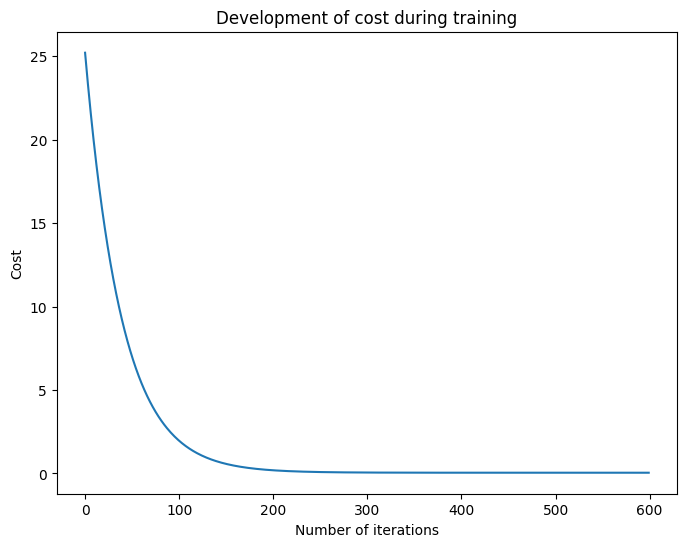

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
# Test
y_train_predict = np.dot(X_train, weights) + bias
y_test_predict = np.dot(X_test, weights) + bias

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train MSE: 0.08019406779241159
Test MSE: 0.06263976478132957


## Stochastic Gradient Descent

In [4]:
def shuffle_data(X, y):
    N, _ = X.shape
    shuffled_idx = np.random.permutation(N)
    return X[shuffled_idx], y[shuffled_idx]

In [40]:
X.shape

(500, 1)

In [46]:
shuffled_x, shuffled_y = shuffle_data(X, y)
# print(len(shuffled_x))
# print(shuffled_y[:10])

for i in range(shuffled_x.shape[0]):
    sample_x = shuffled_x[i]
    print(sample_x.shape)
    if i == 2:
        break

(1,)
(1,)
(1,)


In [29]:
# Stochastic Gradient Descent
# Batch Gradient Descent
def stochastic_gradient_descent(X, y, num_epochs, learning_rate = 0.001):
    # Create weights
    n_samples, n_features = X.shape
    weights = np.zeros(shape=(n_features,1))
    bias = 0
    costs = []
    loss_tolerance = 0.001
    # Set the initial for avg_loss
    avg_loss = float('inf')
    epoch = 0

    # Avoid while the programming is running, but avg_loss is accepted
    while epoch < num_epochs and avg_loss > loss_tolerance:
        running_loss = 0
        shuffled_x, shuffled_y = shuffle_data(X, y)

        for idx in range(shuffled_x.shape[0]):
            # if reshape -1 -> flat all in the same line (12,)
            # if reshpe (-1, 1: number of columns) -> (12, 1)
            # use -1 simply means that it is an unknown dimension and we want numpy to figure it out.
            # (1,) -> a 1D array with 1 element: np.array([1])
            # (1,1) -> a 2D array with 1 cow and 1 column: np.array([[1]])
            sample_x = shuffled_x[idx].reshape(-1, n_features)
            sample_y = shuffled_y[idx].reshape(-1, 1)
            # y_predict = X * weights + bias
            y_predict = np.dot(sample_x, weights) + bias

            # calculate loss or cost
            cost = (1/(2*sample_x.shape[0])) * np.sum((y_predict - sample_y)**2)

            # calculate gradient
            # y_predict - y not y - y_predict
            dw = (1/sample_x.shape[0]) * np.dot(sample_x.T, (y_predict - sample_y))
            db = (1/sample_x.shape[0]) * np.sum((y_predict - sample_y))

            # update
            weights -= learning_rate * dw
            bias -= learning_rate * db
            running_loss += cost
        avg_loss = running_loss / X.shape[0]
        costs.append(avg_loss)
        epoch += 1
    return costs, weights, bias

In [30]:
costs, weights, bias = stochastic_gradient_descent(X_train, y_train, 10)

print(f"Cost: {costs}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")

Cost: [15.80566358222146, 5.694828505096416, 2.067312275236522, 0.7680456641481398, 0.3007284579732207, 0.13355611562820038, 0.07364240459884788, 0.05216487717927629, 0.04447541002620553, 0.04172738717256041]
Weights: [[2.9915372]]
Bias: 5.46772253790132


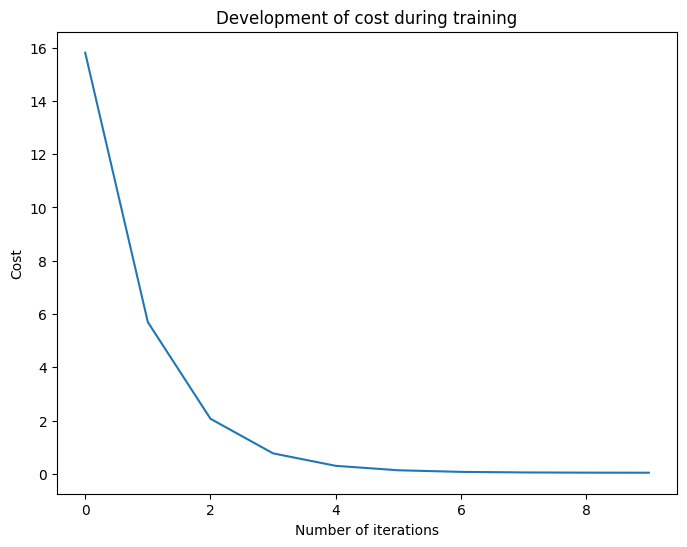

In [31]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(10), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## Mini Batch Gradient Descent

In [47]:
# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, num_epochs, batch_size=32, learning_rate = 0.01):
    # Create weights
    n_samples, n_features = X.shape
    weights = np.zeros(shape=(n_features,1))
    bias = 0
    costs = []

    for epoch in range(num_epochs):
        running_loss = 0
        shuffled_x, shuffled_y = shuffle_data(X, y)

        for idx in range(0, n_samples, batch_size):
            sample_x = shuffled_x[idx: idx + batch_size].reshape(-1, n_features)
            sample_y = shuffled_y[idx: idx + batch_size].reshape(-1, 1)
            # y_predict = X * weights + bias
            y_predict = np.dot(sample_x, weights) + bias

            # calculate loss or cost
            cost = (1/(2*sample_x.shape[0])) * np.sum((y_predict - sample_y)**2)

            # calculate gradient
            # y_predict - y not y - y_predict
            dw = (1/sample_x.shape[0]) * np.dot(sample_x.T, (y_predict - sample_y))
            db = (1/sample_x.shape[0]) * np.sum((y_predict - sample_y))

            # update
            weights -= learning_rate * dw
            bias -= learning_rate * db
            running_loss += cost
        avg_loss = running_loss / X.shape[0]
        costs.append(avg_loss)
        epoch += 1
    return costs, weights, bias

In [48]:
costs, weights, bias = mini_batch_gradient_descent(X_train, y_train, 10)

print(f"Cost: {costs}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")

Cost: [0.7076432086688393, 0.5035977758061376, 0.3607674303860647, 0.2587083675192963, 0.18571733489183292, 0.13341374114321064, 0.09585086684523646, 0.0687634523257073, 0.04955556490313269, 0.03602195823918579]
Weights: [[2.44199257]]
Bias: 4.472856888607315


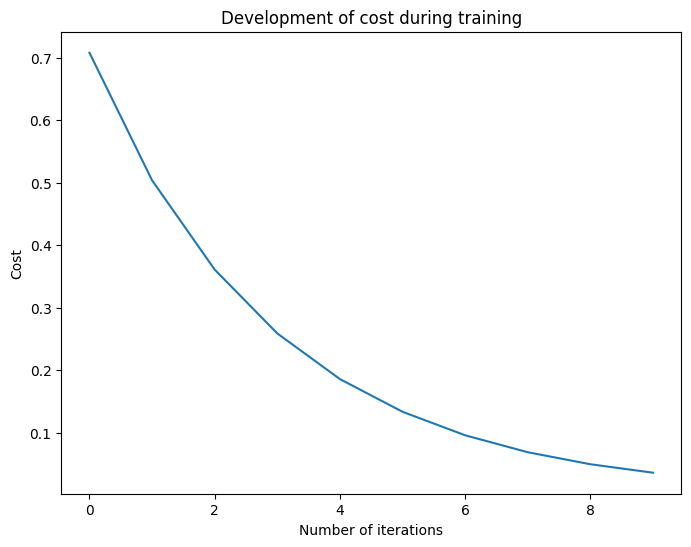

In [49]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(10), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## Shuffle Data

In [ ]:
def shuffle_data(X, y, seed=None):
    if seed:
        np.random.seed(seed)
    # get index of all in X
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

# Feature Scaling

## Transformation Input

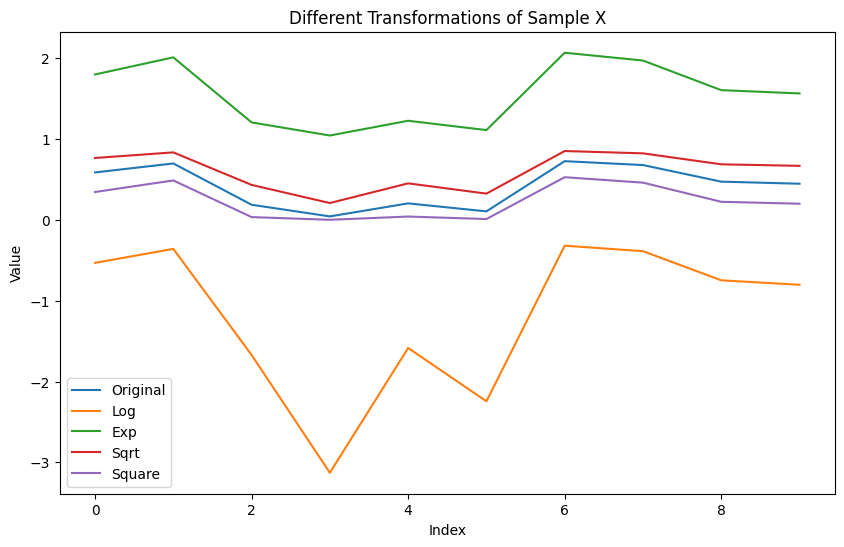

In [60]:
# Get the sample of X
sample_x = X[:10]
# print(sample_x.shape)
# print(sample_x)

# Log
log_input = np.log(sample_x)
# print(log_input)

# exp
exp_input = np.exp(sample_x)
# print(exp_input)

# sqrt
sqrt_input = np.sqrt(sample_x)
# print(sqrt_input)

# square
square_input = np.square(sample_x)
# print(square_input)

# Plot all elements into a figure
fig = plt.figure(figsize=(10, 6))
plt.plot(sample_x, label='Original')
plt.plot(log_input, label='Log')
plt.plot(exp_input, label='Exp')
plt.plot(sqrt_input, label='Sqrt')
plt.plot(square_input, label='Square')
# Add legend
plt.legend()
# Add title and labels
plt.title('Different Transformations of Sample X')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

## Generalization

In [ ]:
# Plit into 3 sets: Train, Test and Validation: to tune hyperparameter
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xtrain,labels,test_size=0.2,train_size=0.8)
X_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

## Standization

[[-1.21861246]
 [-1.10751823]
 [-1.61847502]
 [-1.76281841]
 [-1.60160802]
 [-1.7005641 ]
 [-1.07938683]
 [-1.12722645]
 [-1.33278127]
 [-1.35833115]]


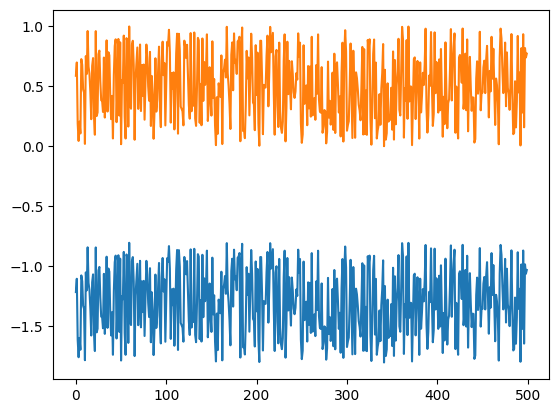

In [63]:
def standarization(X):
    mean = np.mean(X)
    std = np.std(X)
    X_scale = X - mean/std
    return X_scale
X_scaled = standarization(X)
print(X_scaled[:10])

plt.plot(X_scaled)
plt.plot(X)

## Mean Normalization

[[ 0.08417314]
 [ 0.19529983]
 [-0.31580628]
 [-0.46019185]
 [-0.29893435]
 [-0.39791935]
 [ 0.22343945]
 [ 0.17558585]
 [-0.03002904]
 [-0.05558639]]


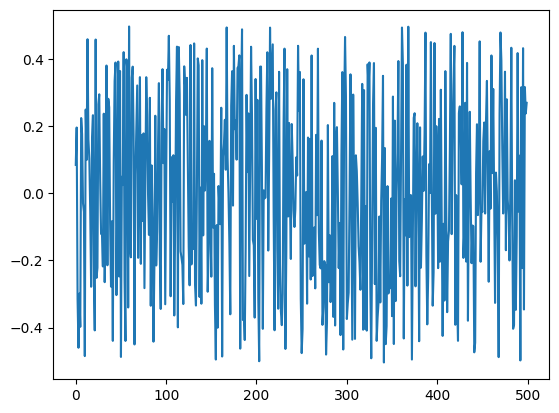

In [65]:
def mean_normalization(X):
    X_scale = (X - np.mean(X))/(max(X) - min(X))
    return X_scale
X_scaled = mean_normalization(X)
print(X_scaled[:10])

plt.plot(X_scaled)
# plt.plot(X)

## Max-Min Normalization

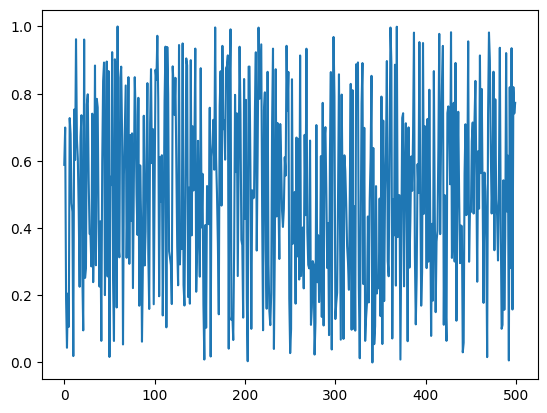

In [66]:
def max_min_normalization(X):
    X_scaled = (X - min(X))/(max(X) - min(X))
    return X_scaled

X_scaled = max_min_normalization(X)

plt.plot(X_scaled)

## Unit Normalization

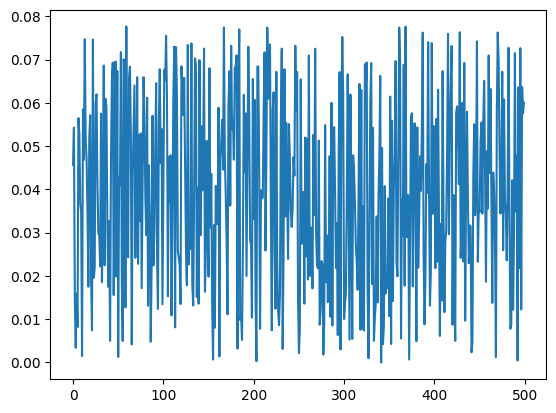

In [69]:
def unit_vector_normalization(X):
     # How to calculate \hat{x} = \frac{x}{||x||}
     # linalg.norm to calculate the Euclidean norm of the array X
     return X / np.linalg.norm(X)
X_scaled = unit_vector(X)

plt.plot(X_scaled)

# Polynomial

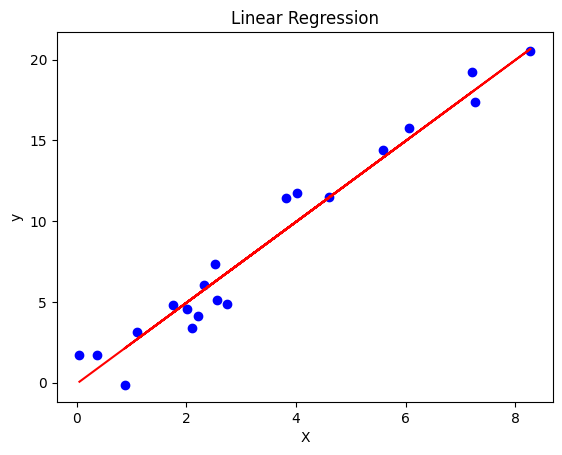

In [72]:
# Polynomial linear regression
# Generate sample data
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X + np.random.randn(100, 1)  # Targets with noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plotting
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

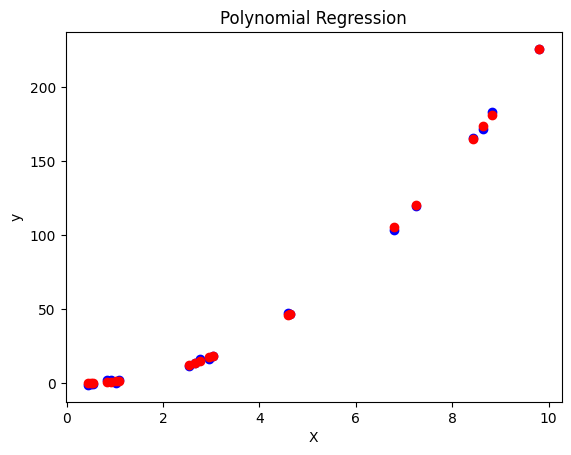

In [81]:
# Generate sample data
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X**2 - 1.5 * X + np.random.randn(100, 1)  # Targets with noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=30)

# Applied polynomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

# Plotting
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Regularization

In [82]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.94
Lasso Regression-Test set score: 0.92


In [83]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.94
Ridge Regression-Test set score: 0.92


In [84]:
# Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.94
Elastic Net-Test set score: 0.92
